# Library's Importation

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Data Reading 

In [2]:
df=pd.read_csv(r"C:\xampp\htdocs\lina\project\ds\Sleep_health_and_lifestyle_dataset.csv", encoding="ISO-8859-1", sep=',')
print(df.head(10))        

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60    

# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
df['Sleep Disorder'].fillna('No disorder detected',inplace=True)
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps        Sleep Disorder  
0         126/83          77         4200  No disorder detected  
1         125/80          75        10000  No disorder detected  
2         125/80          75        10000  No disorder detected  
3         140/90          85         3000           Sleep Apnea  
4         140/90          85         3000           Sleep Apnea

In [7]:
df.isnull().sum().sum()

0

In [8]:
print (df['BMI Category'].value_counts())

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


In [9]:
df['BMI Category'] = df['BMI Category'].replace('Normal', 'Normal Weight')
print (df['BMI Category'].value_counts())

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64


In [10]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df.drop(columns=['Blood Pressure'], inplace=True)

In [11]:
def bp_category (s,d):
    s=int(s)
    d=int(d)
    if (s<120) and (d<80):
        return 'Normal'
    if (s<129) and (d<80):
        return 'Elevated'
    if (s<130) or (d<89):
        return 'Hypertension Stage 1'
    if (s>=140) or (d>=90):
        return 'Hypertension Stage 2'
    return 'Need a Doctor'

df['Blood Pressure Category'] = df.apply(lambda row: bp_category(row['Systolic'], row['Diastolic']), axis=1)

In [12]:
df.drop(['Person ID'], axis=1, inplace=True)

In [13]:
df.head(10)

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   
5   Male   28     Software Engineer             5.9                 4   
6   Male   29               Teacher             6.3                 6   
7   Male   29                Doctor             7.8                 7   
8   Male   29                Doctor             7.8                 7   
9   Male   29                Doctor             7.8                 7   

   Physical Activity Level  Stress Level   BMI Category  Heart Rate  \
0                       42             6     Overweight          77   
1                       60             8  Normal Weight          75   
2                       60             8  Normal Weight          75   
3                       30             8          Obese          85   
4                       30             8          Obese          85   
5                       30             8          Obese          85   
6                       40             7          Obese          82   
7                       75             6  Normal Weight          70   
8                       75             6  Normal Weight          70   
9                       75             6  Normal Weight          70   

   Daily Steps        Sleep Disorder Systolic Diastolic  \
0         4200  No disorder detected      126        83   
1        10000  No disorder detected      125        80   
2        10000  No disorder detected      125        80   
3         3000           Sleep Apnea      140        90   
4         3000           Sleep Apnea      140        90   
5         3000              Insomnia      140        90   
6         3500              Insomnia      140        90   
7         8000  No disorder detected      120        80   
8         8000  No disorder detected      120        80   
9         8000  No disorder detected      120        80   

  Blood Pressure Category  
0    Hypertension Stage 1  
1    Hypertension Stage 1  
2    Hypertension Stage 1  
3    Hypertension Stage 2  
4    Hypertension Stage 2  
5    Hypertension Stage 2  
6    Hypertension Stage 2  
7    Hypertension Stage 1  
8    Hypertension Stage 1  
9    Hypertension Stage 1

In [14]:
df1=df.copy()

def replace_gender(a):
    a['Gender']=a['Gender'].replace({'Female': 0, 'Male': 1})
    return a

def replace_bmi_category_values(a):
    
   a['BMI Category']=a['BMI Category'].replace({
       'Normal Weight': 0,
       'Obese' : 1,
       'Overweight': 2,
   })
   return a

def replace_SleepDisorder_category_values(a):
   a['Sleep Disorder']=a['Sleep Disorder'].replace({
       'No disorder detected': 0,
       'Sleep Apnea': 1,
       'Insomnia': 2,
   })
   return a

df1=replace_gender(df1)
df1= replace_bmi_category_values(df1)
df1= replace_SleepDisorder_category_values(df1)
df1 = df1.drop(['Occupation'], axis=1)
df1=df1.drop(['Blood Pressure Category'], axis=1)


df1.head()

Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0       1   27             6.1                 6                       42   
1       1   28             6.2                 6                       60   
2       1   28             6.2                 6                       60   
3       1   28             5.9                 4                       30   
4       1   28             5.9                 4                       30   

   Stress Level  BMI Category  Heart Rate  Daily Steps  Sleep Disorder  \
0             6             2          77         4200               0   
1             8             0          75        10000               0   
2             8             0          75        10000               0   
3             8             1          85         3000               1   
4             8             1          85         3000               1   

  Systolic Diastolic  
0      126        83  
1      125        80  
2      125        80  
3      140        90  
4      140        90

In [15]:
df.head()

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level   BMI Category  Heart Rate  \
0                       42             6     Overweight          77   
1                       60             8  Normal Weight          75   
2                       60             8  Normal Weight          75   
3                       30             8          Obese          85   
4                       30             8          Obese          85   

   Daily Steps        Sleep Disorder Systolic Diastolic  \
0         4200  No disorder detected      126        83   
1        10000  No disorder detected      125        80   
2        10000  No disorder detected      125        80   
3         3000           Sleep Apnea      140        90   
4         3000           Sleep Apnea      140        90   

  Blood Pressure Category  
0    Hypertension Stage 1  
1    Hypertension Stage 1  
2    Hypertension Stage 1  
3    Hypertension Stage 2  
4    Hypertension Stage 2

# Data Visiualisation

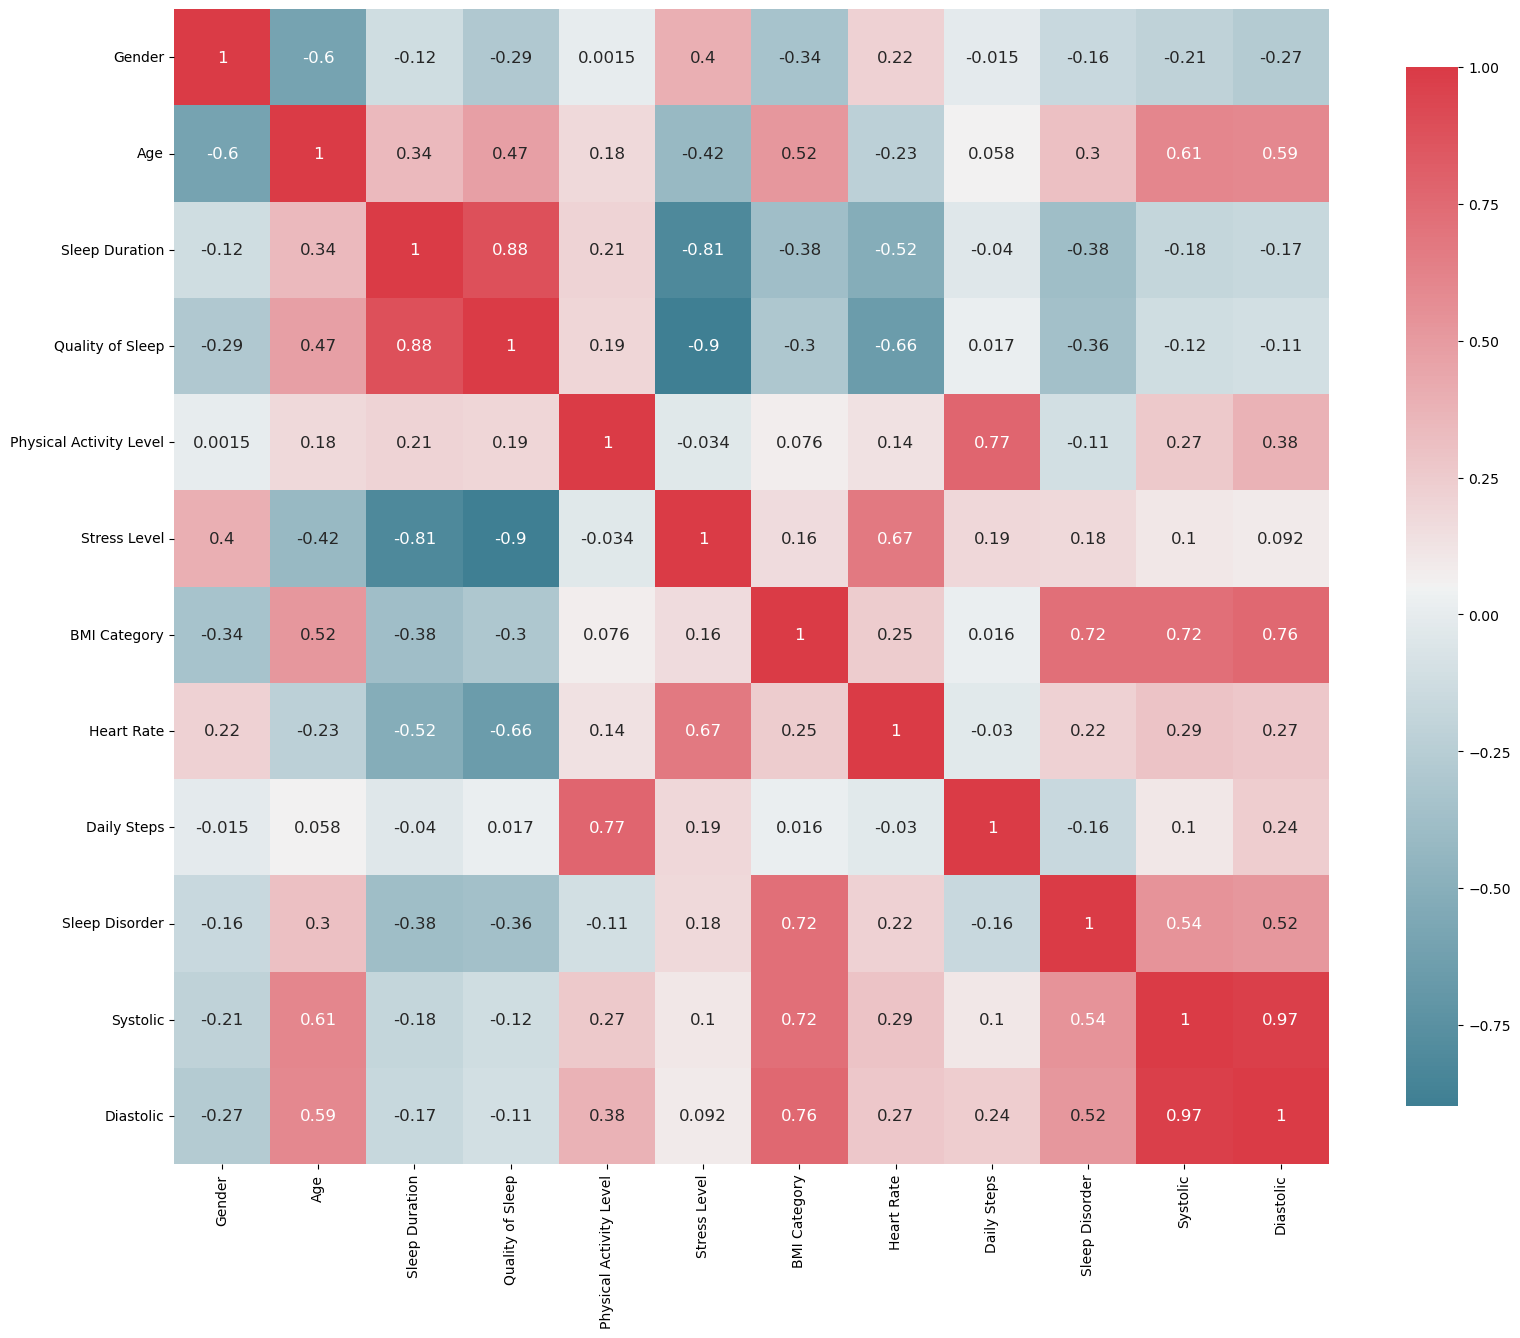

In [16]:
#correlation heatmap

def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots(figsize=( 20 , 15 ))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df1)

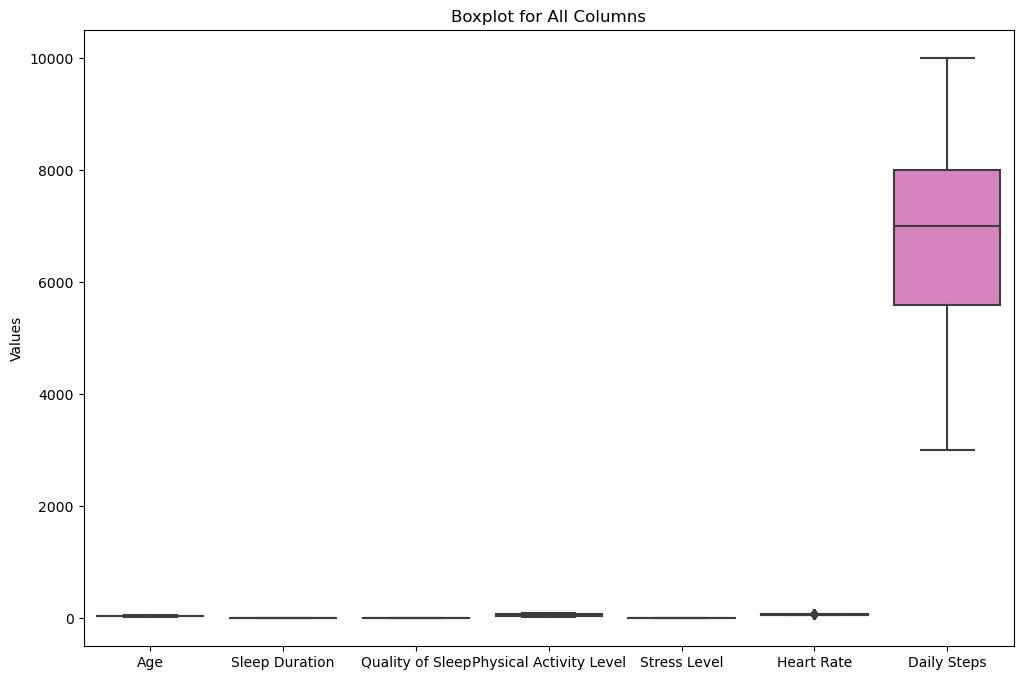

In [17]:
#outliers detection
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.title("Boxplot for All Columns")
plt.ylabel("Values")
plt.show()

In [18]:
def stacked_column_chart(dataframe, x_column, y_column, title):
    
    grouped_df = dataframe.groupby([x_column, y_column]).size().reset_index(name='Count')
    pivot_df = grouped_df.pivot_table(index=x_column, columns=y_column, values='Count', fill_value=0)
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel('Count')
    plt.legend(title=y_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [19]:
def pie_chart(dataframe,name_column,title):
    
    column_counts = dataframe[name_column].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#f0f8ff', '#cdb79e', '#dedede']
    plt.figure(figsize=(8, 8))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(title)
    plt.show()

In [20]:
def line_chart(dataframe,x,y,title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=x, y=y, data=dataframe, marker='o')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [21]:
def bubble_chart(df, x, y, title):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, color='purple', size=1 , data=df, sizes=(20, 200), legend="full", alpha=0.7)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

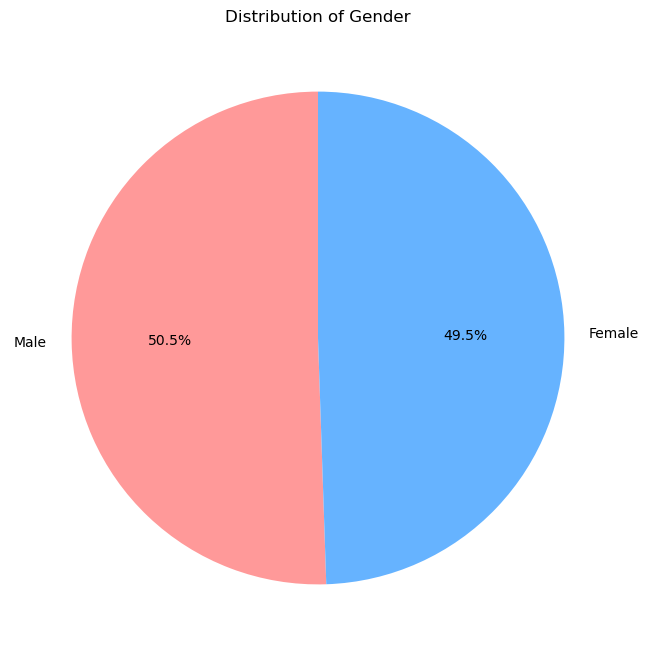

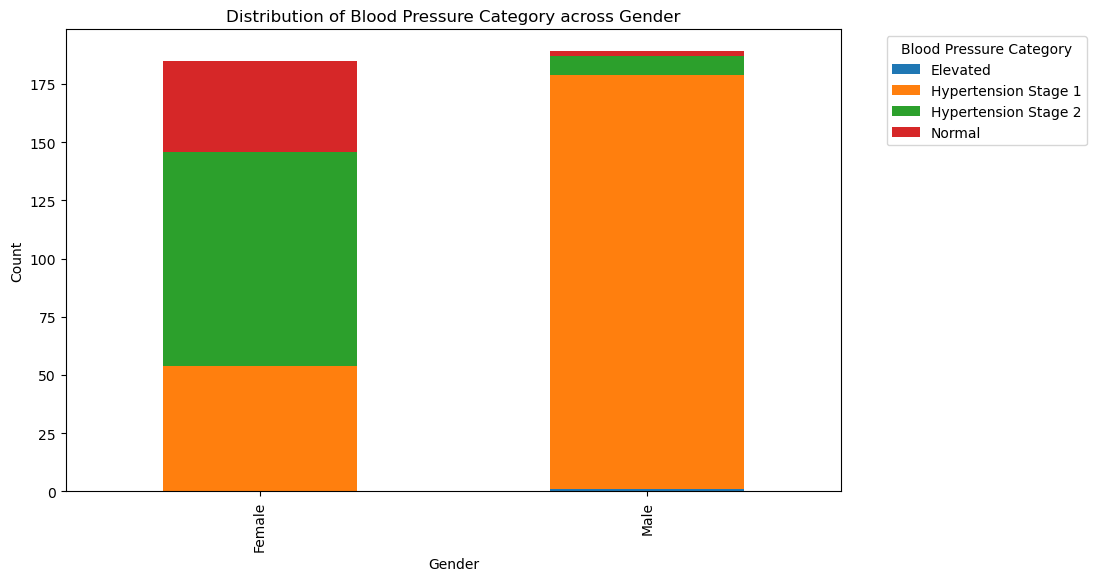

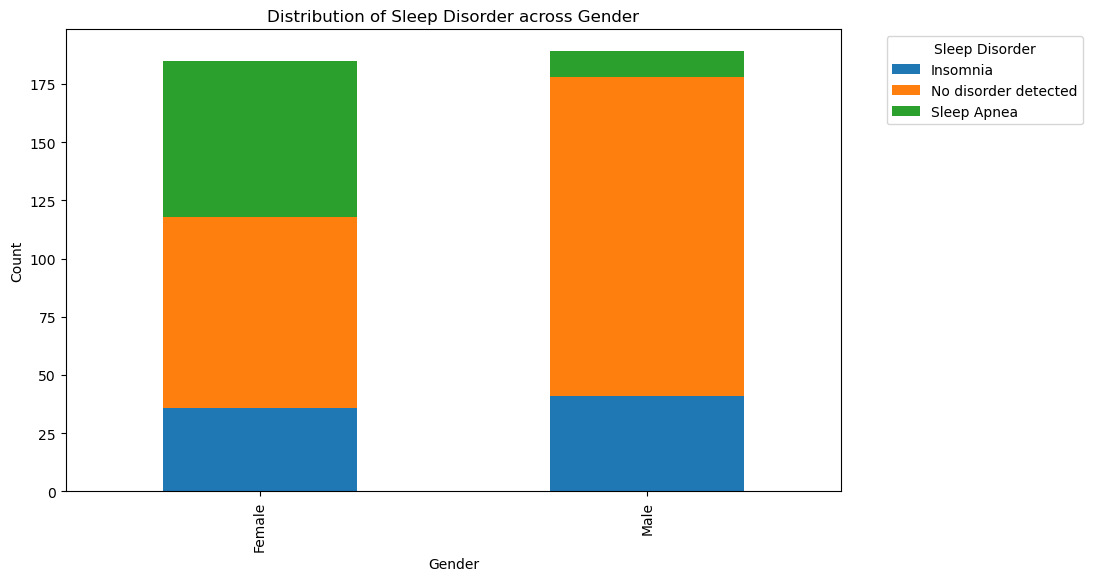

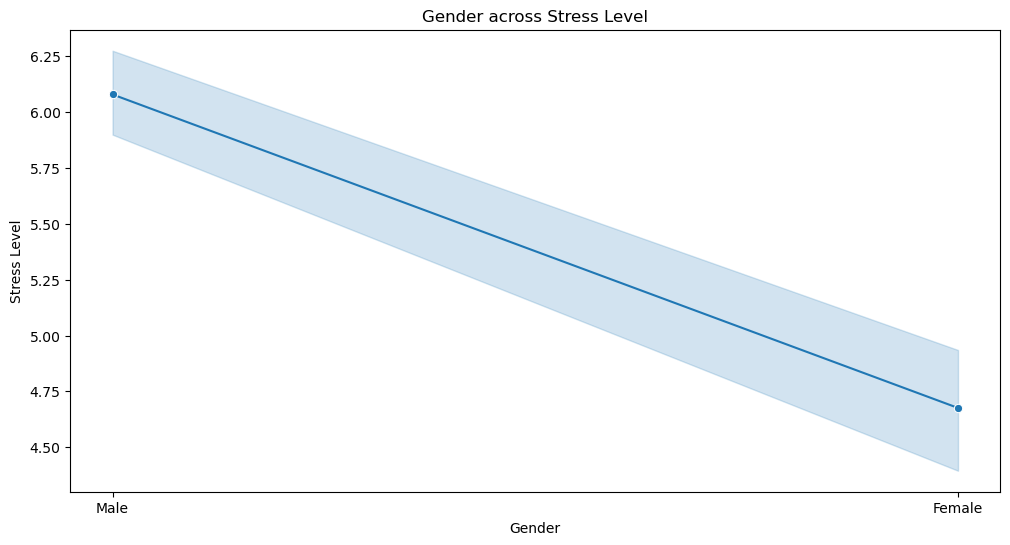

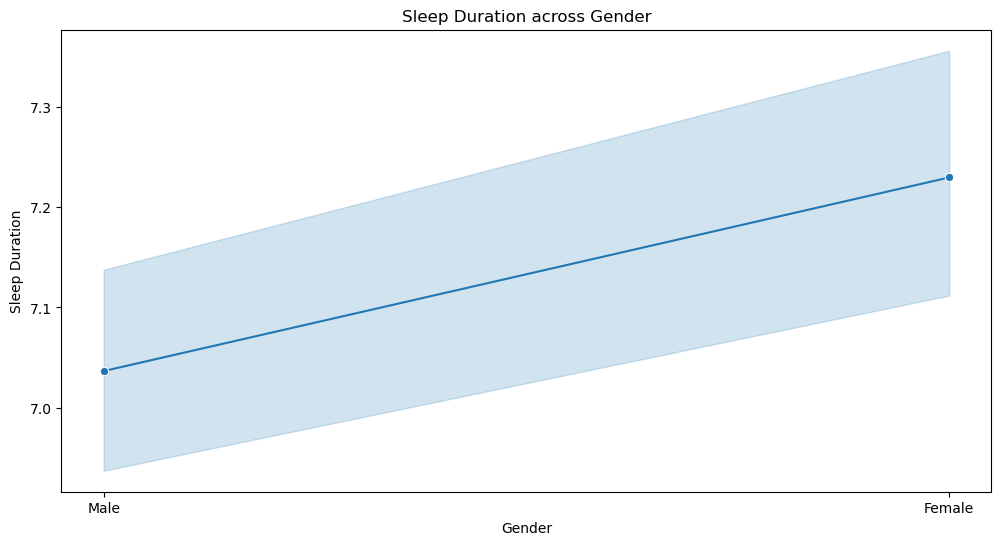

In [22]:
pie_chart(df,'Gender','Distribution of Gender')
stacked_column_chart(df, 'Gender', 'Blood Pressure Category', 'Distribution of Blood Pressure Category across Gender')
stacked_column_chart(df, 'Gender', 'Sleep Disorder', 'Distribution of Sleep Disorder across Gender')
line_chart(df,'Gender', 'Stress Level','Gender across Stress Level')
line_chart(df,'Gender', 'Sleep Duration','Sleep Duration across Gender')

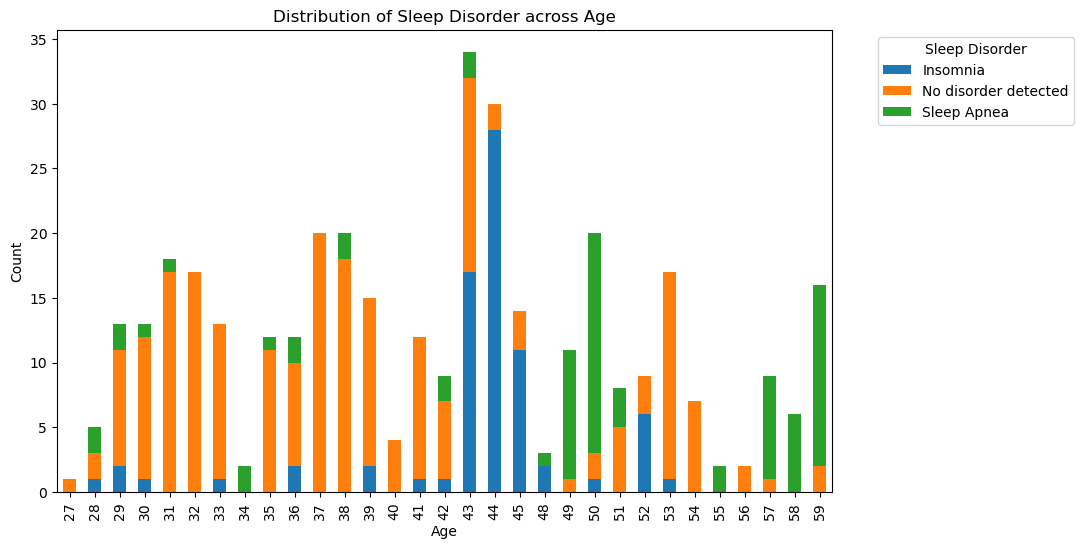

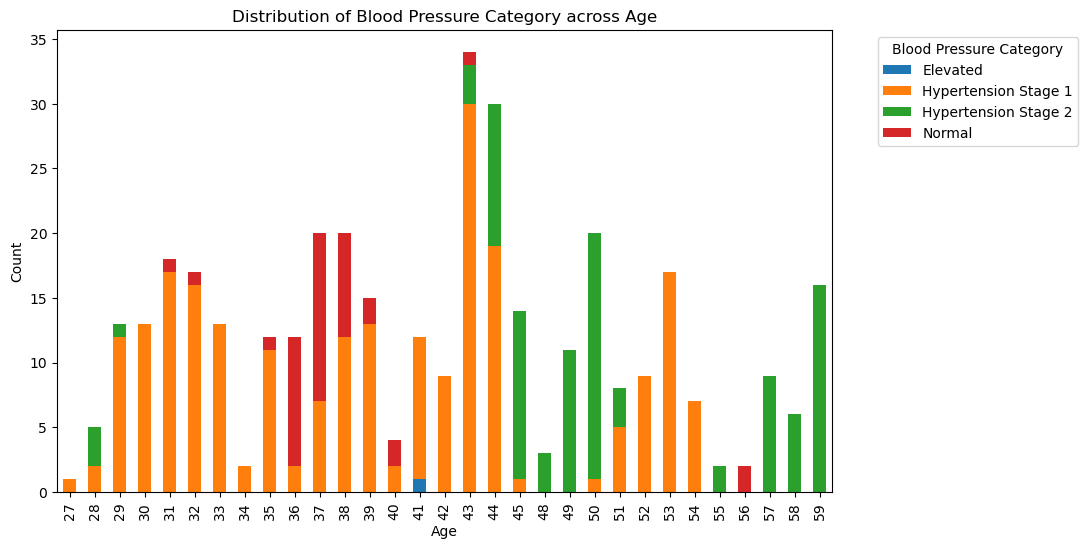

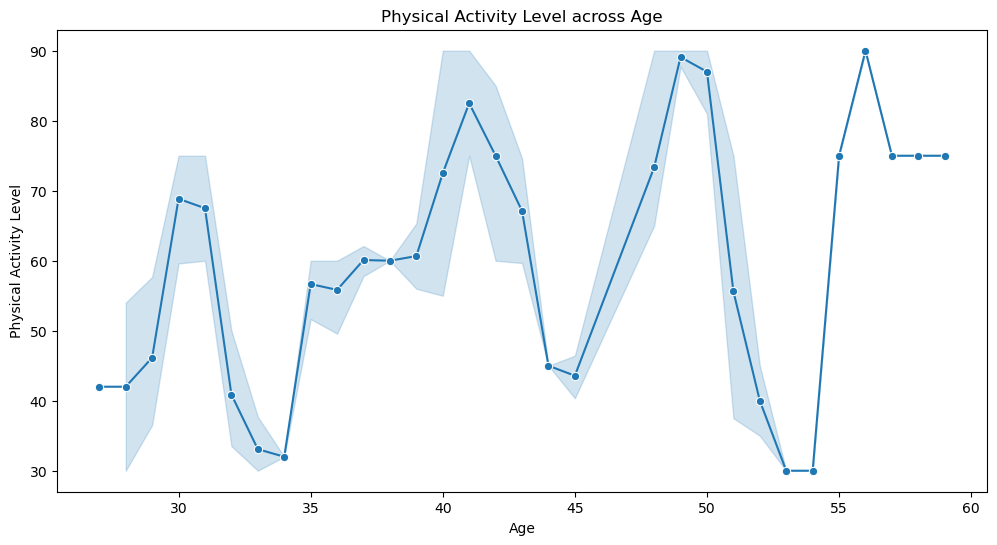

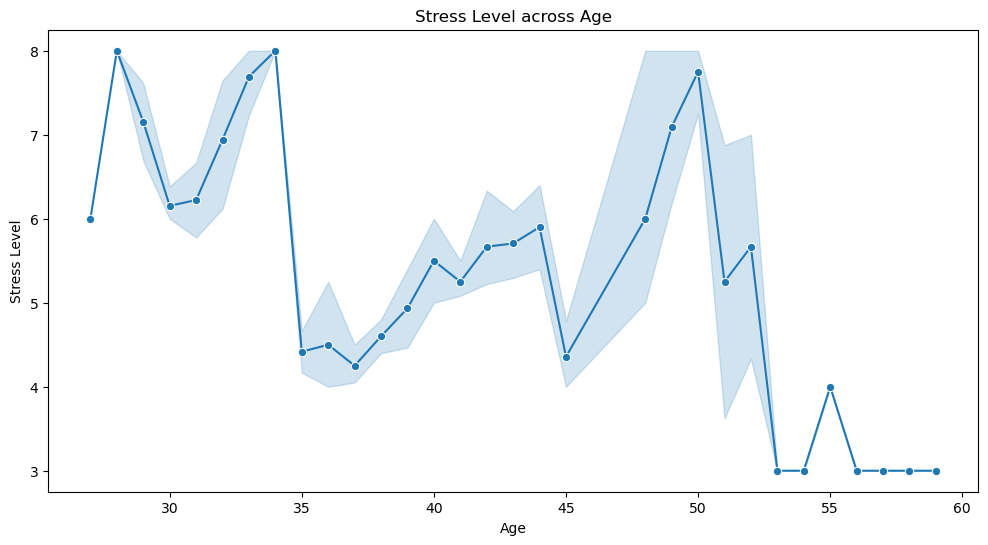

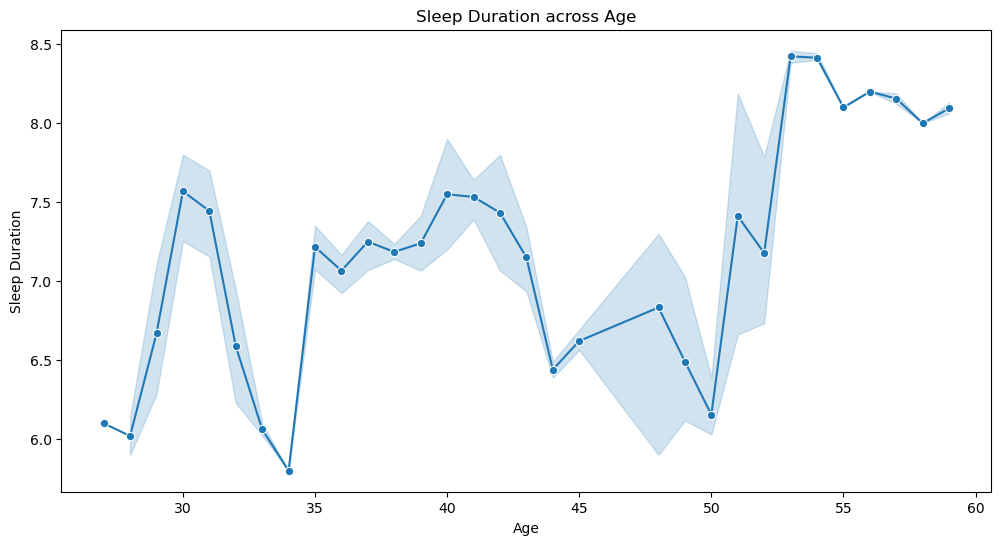

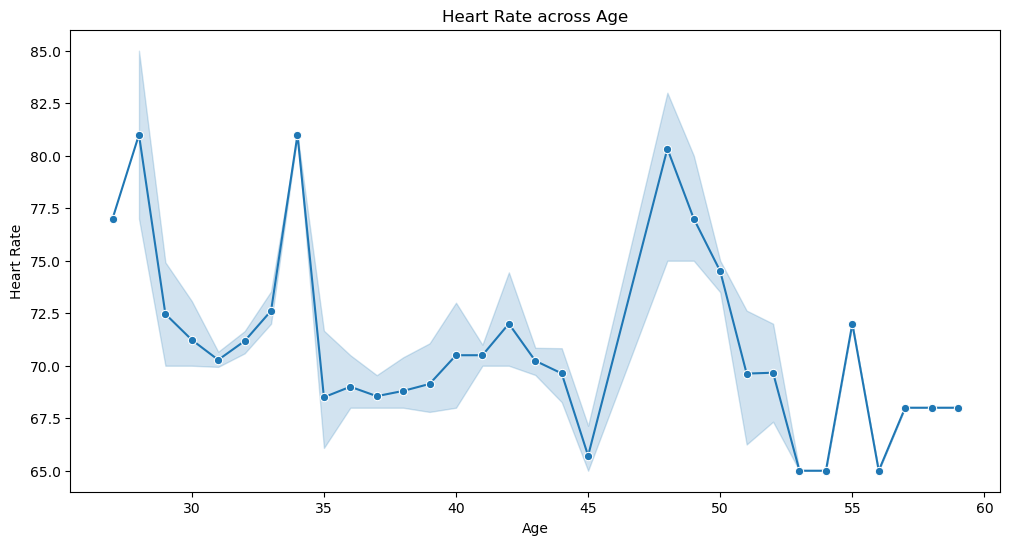

In [23]:
stacked_column_chart(df, 'Age', 'Sleep Disorder', 'Distribution of Sleep Disorder across Age')
stacked_column_chart(df, 'Age', 'Blood Pressure Category', 'Distribution of Blood Pressure Category across Age')
line_chart(df,'Age', 'Physical Activity Level','Physical Activity Level across Age')
line_chart(df,'Age', 'Stress Level','Stress Level across Age')
line_chart(df,'Age', 'Sleep Duration','Sleep Duration across Age')
line_chart(df,'Age', 'Heart Rate','Heart Rate across Age')

<Axes: xlabel='Sleep Duration', ylabel='Occupation'>

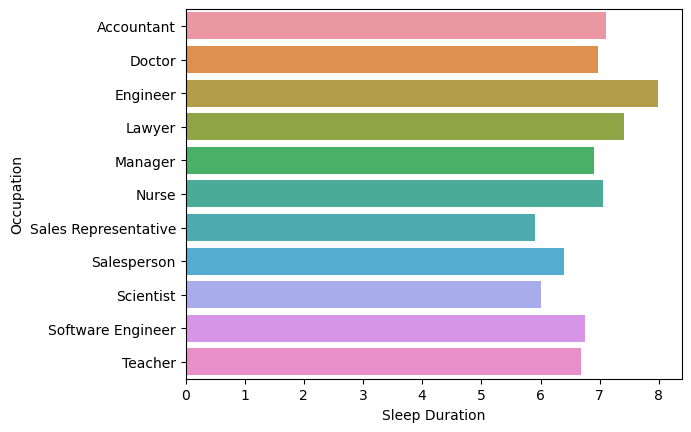

In [24]:
average_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()
sns.barplot(x='Sleep Duration', y='Occupation', data=average_sleep_by_occupation)

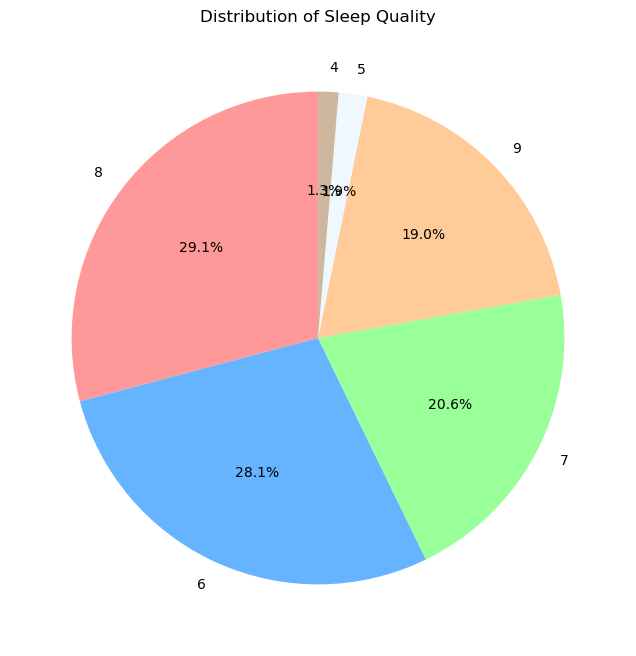

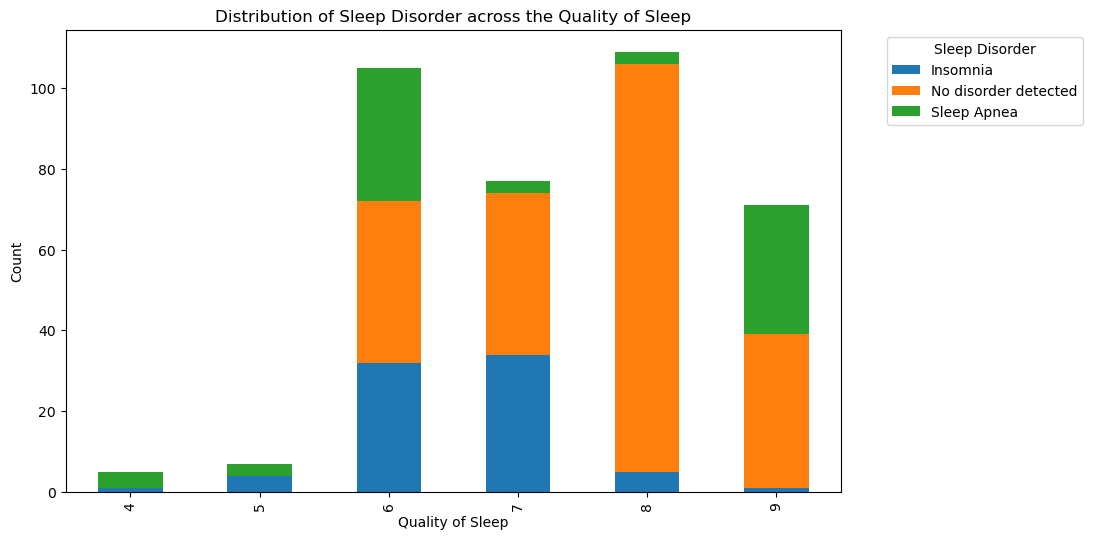

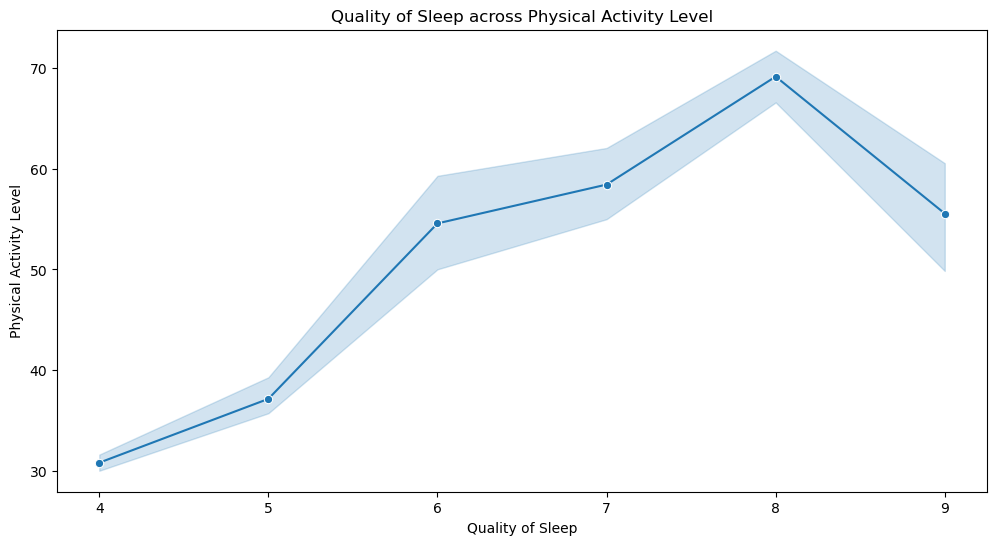

In [25]:
pie_chart(df,'Quality of Sleep','Distribution of Sleep Quality')
stacked_column_chart(df, 'Quality of Sleep', 'Sleep Disorder', 'Distribution of Sleep Disorder across the Quality of Sleep')
line_chart(df,'Quality of Sleep', 'Physical Activity Level','Quality of Sleep across Physical Activity Level')

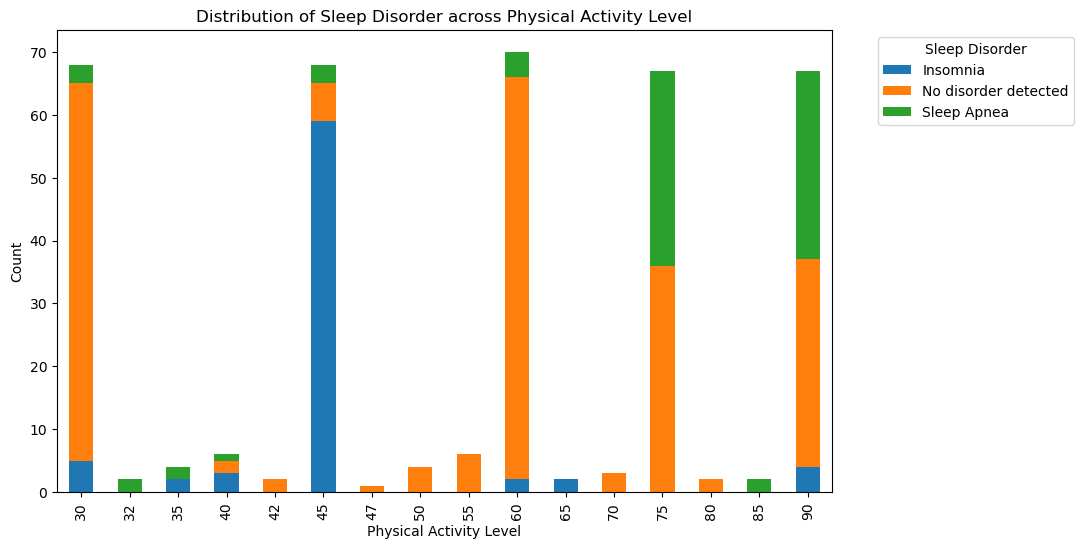

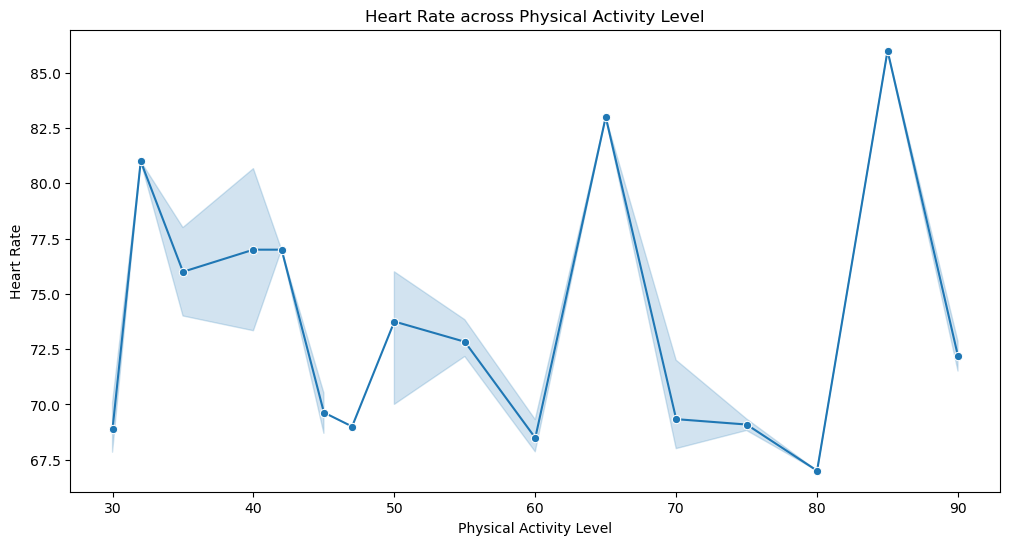

In [26]:
stacked_column_chart(df, 'Physical Activity Level', 'Sleep Disorder', 'Distribution of Sleep Disorder across Physical Activity Level')
line_chart(df,'Physical Activity Level', 'Heart Rate','Heart Rate across Physical Activity Level')

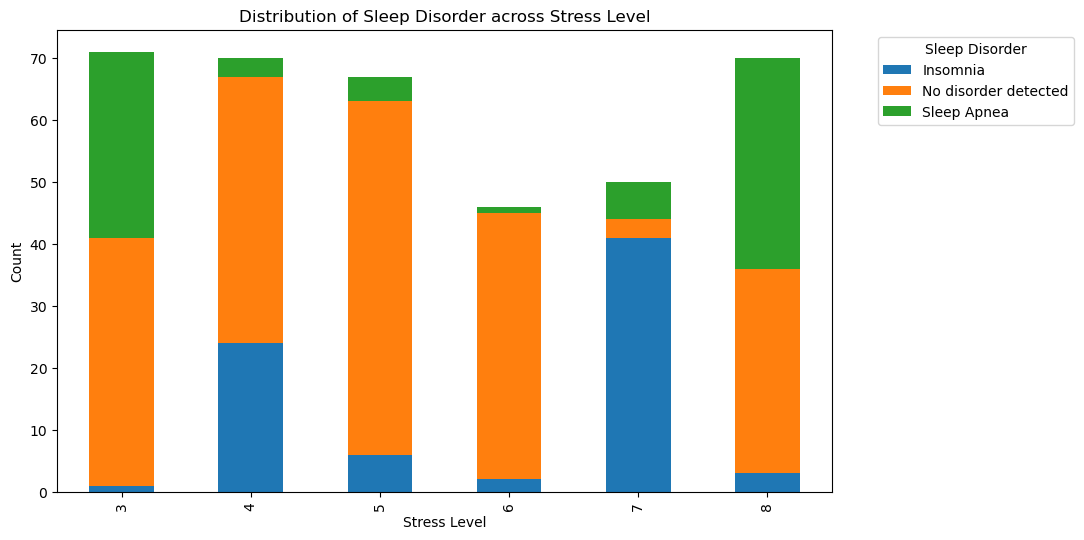

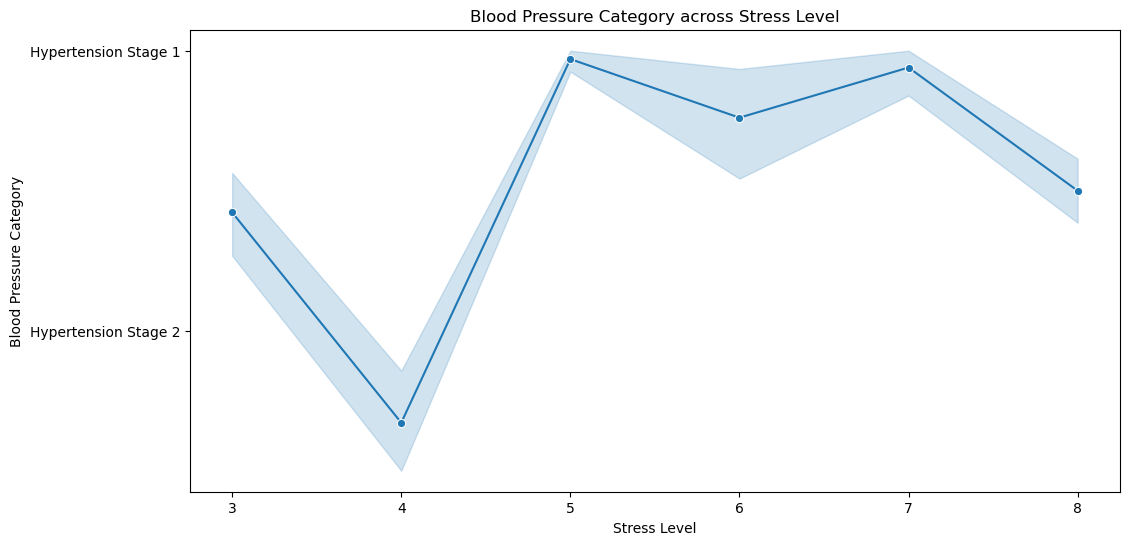

In [27]:
stacked_column_chart(df, 'Stress Level', 'Sleep Disorder', 'Distribution of Sleep Disorder across Stress Level')
line_chart(df,'Stress Level', 'Blood Pressure Category','Blood Pressure Category across Stress Level')
#line_chart(df,'Stress Level', 'Sleep Disorder','Sleep Disorder across Stress Level')

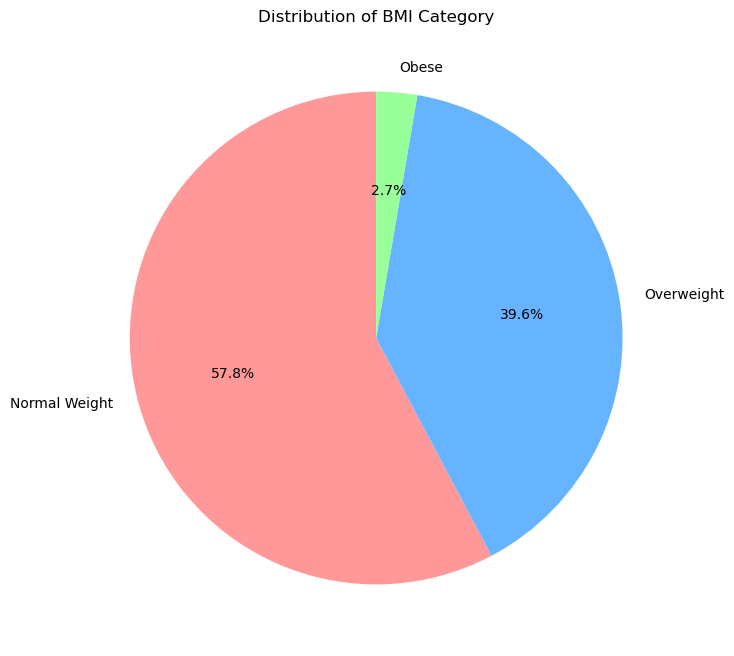

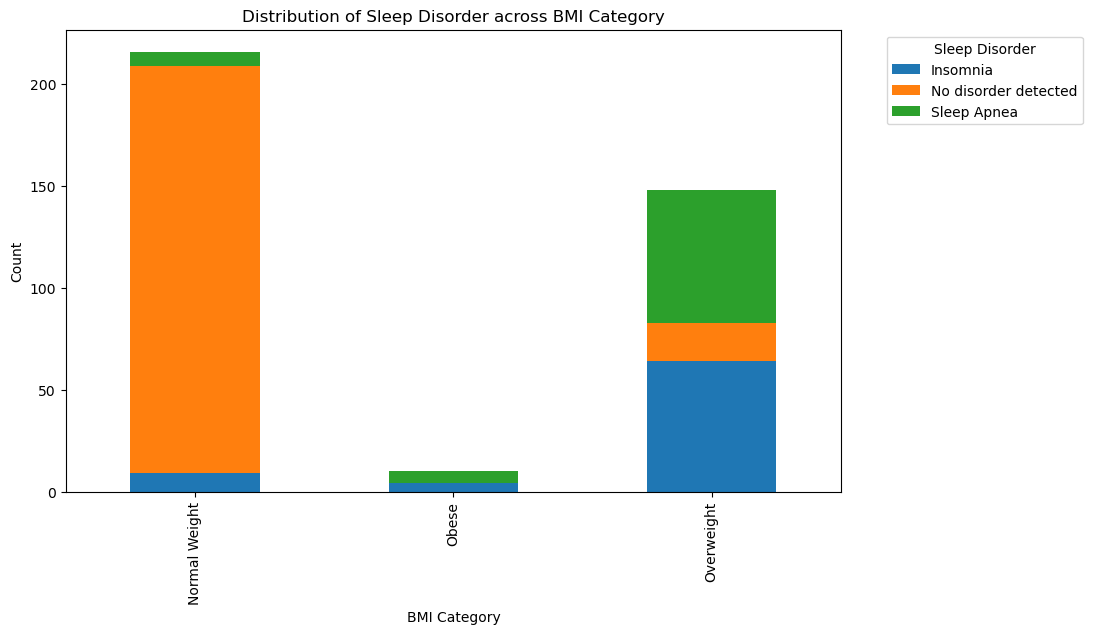

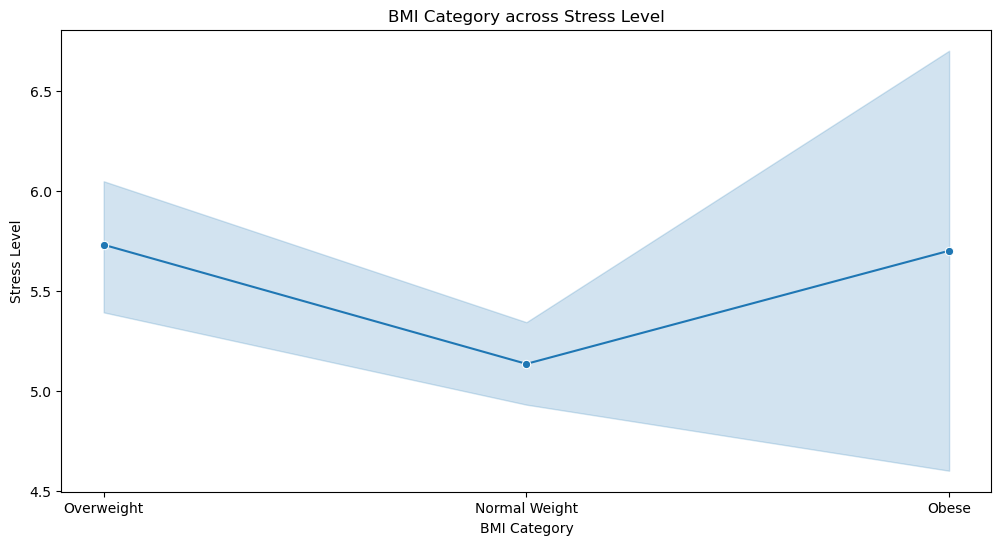

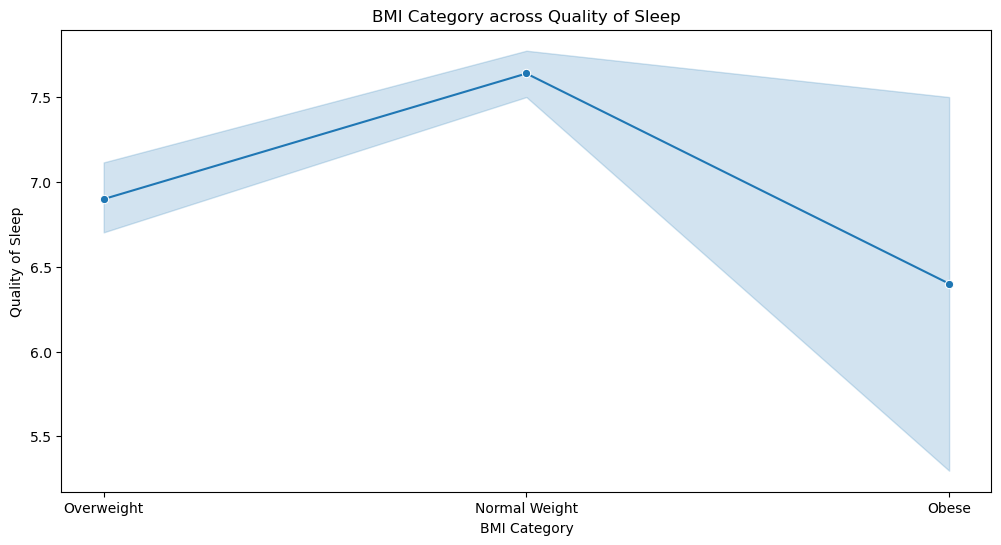

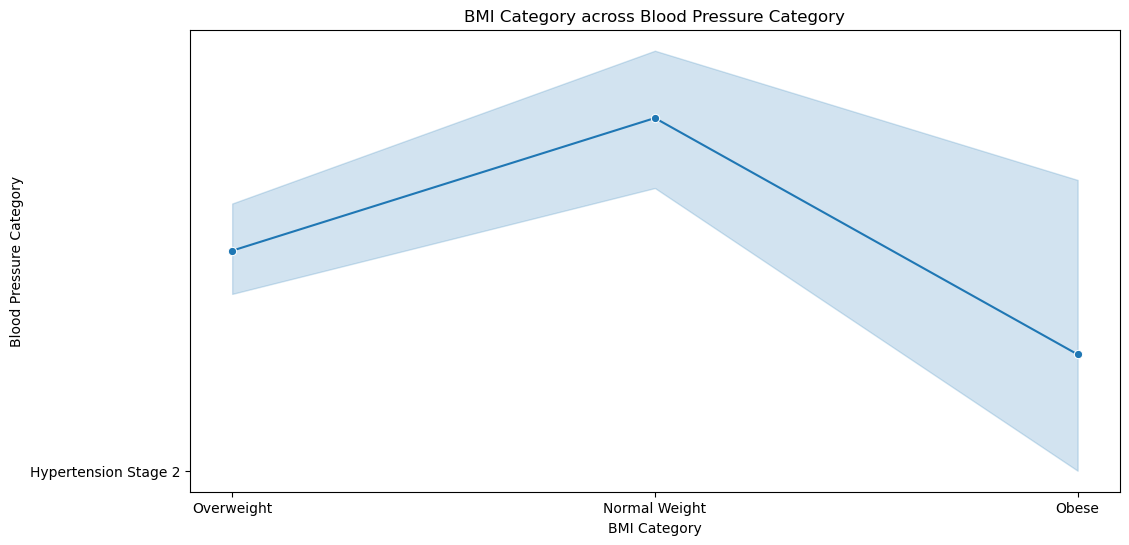

In [28]:
pie_chart(df,'BMI Category','Distribution of BMI Category')
stacked_column_chart(df, 'BMI Category', 'Sleep Disorder', 'Distribution of Sleep Disorder across BMI Category')
line_chart(df,'BMI Category', 'Stress Level','BMI Category across Stress Level')
line_chart(df,'BMI Category', 'Quality of Sleep','BMI Category across Quality of Sleep')
line_chart(df,'BMI Category', 'Blood Pressure Category','BMI Category across Blood Pressure Category')

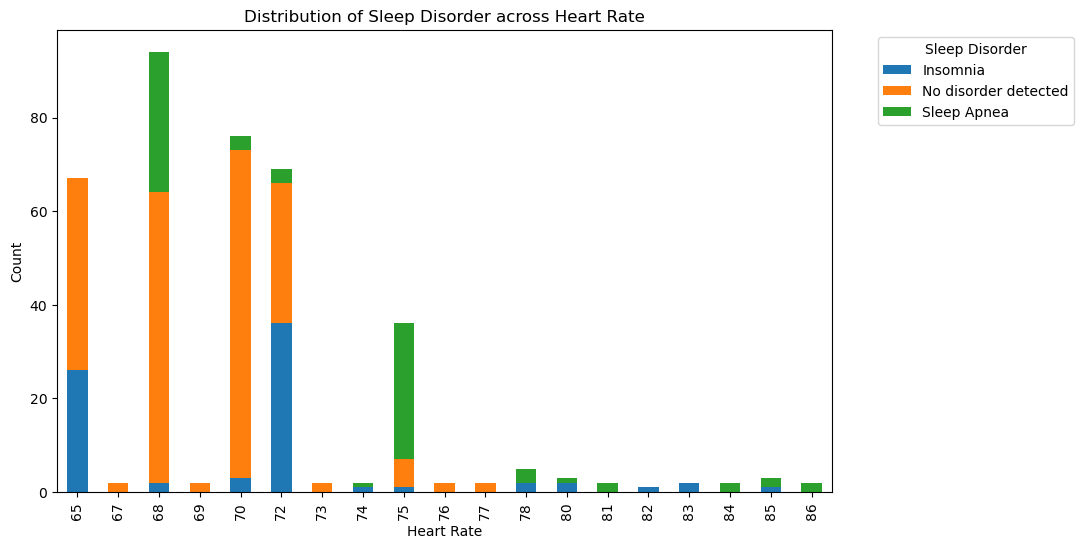

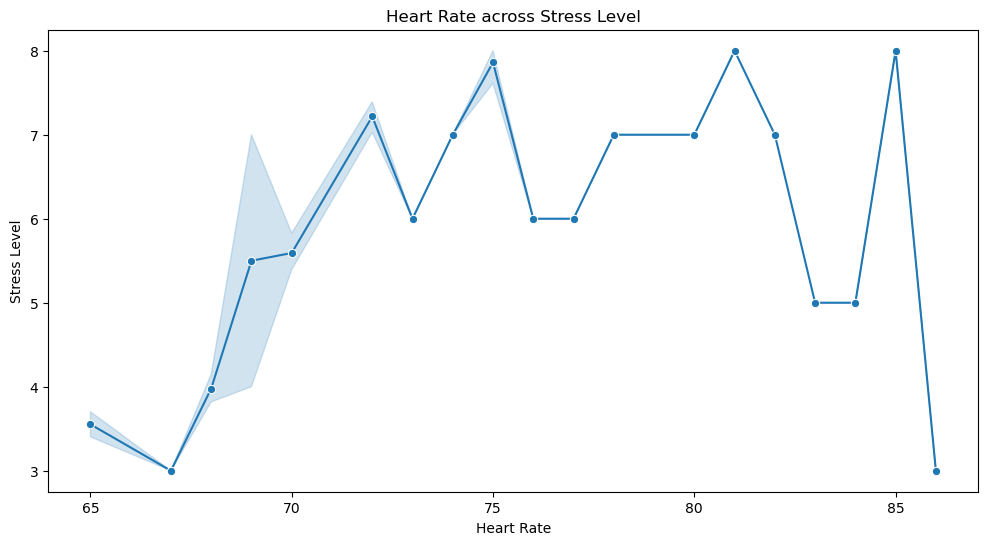

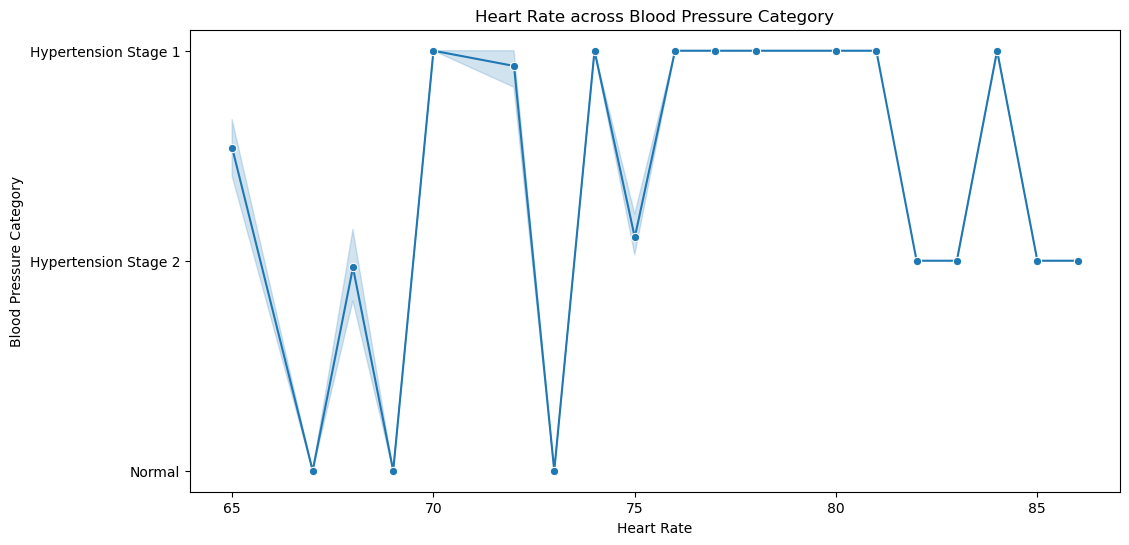

In [29]:
stacked_column_chart(df, 'Heart Rate', 'Sleep Disorder', 'Distribution of Sleep Disorder across Heart Rate')
fig = px.scatter(df, x="Heart Rate", y="Physical Activity Level", log_x=True, size_max=60)
fig.show()
line_chart(df,'Heart Rate', 'Stress Level','Heart Rate across Stress Level')
line_chart(df,'Heart Rate', 'Blood Pressure Category','Heart Rate across Blood Pressure Category')

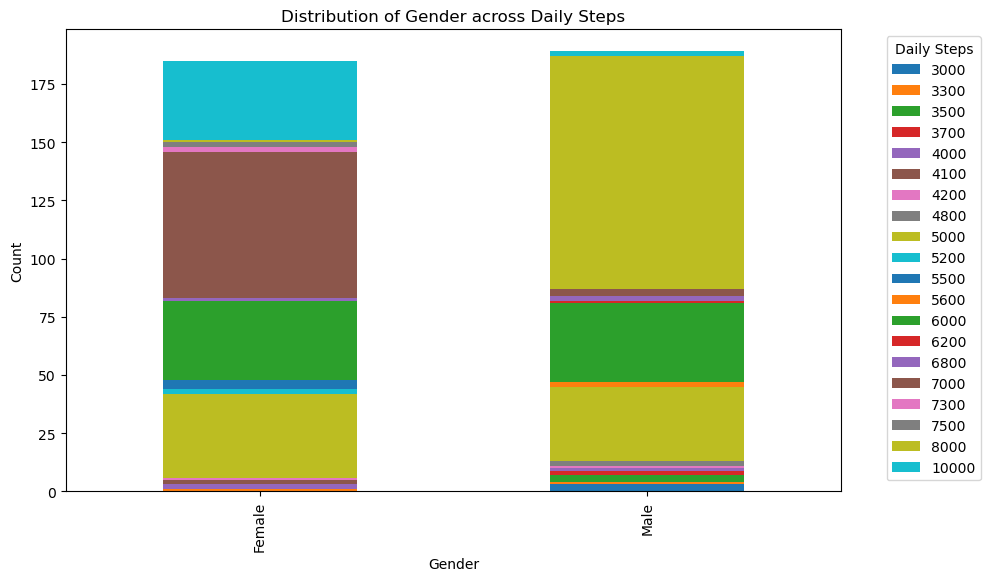

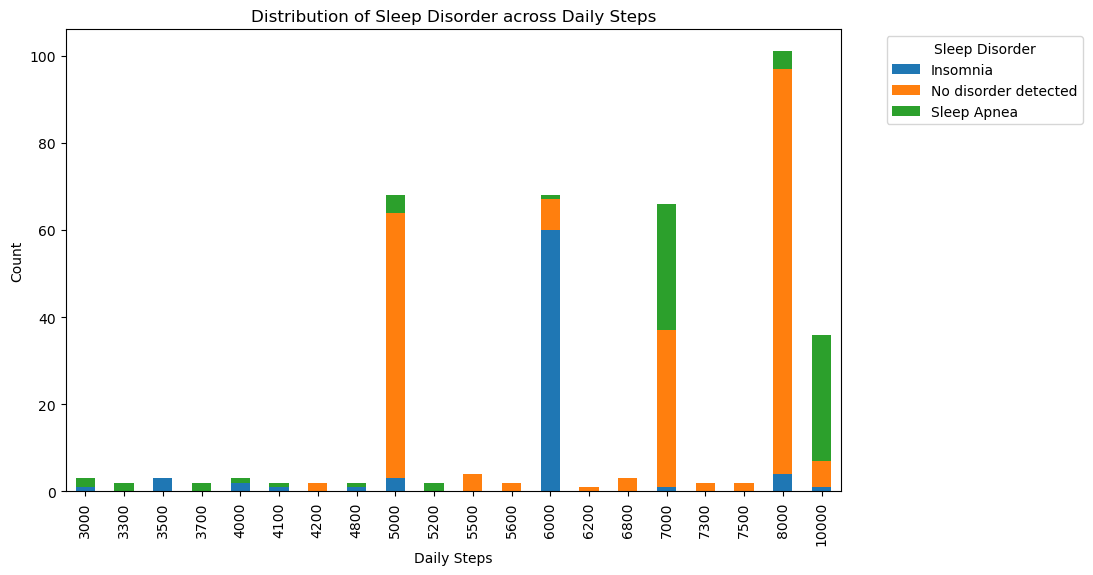

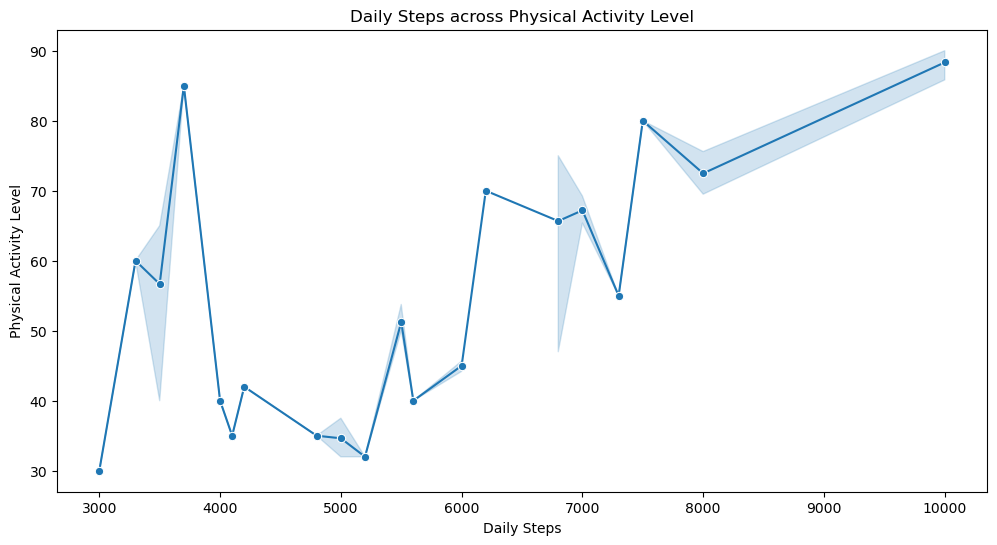

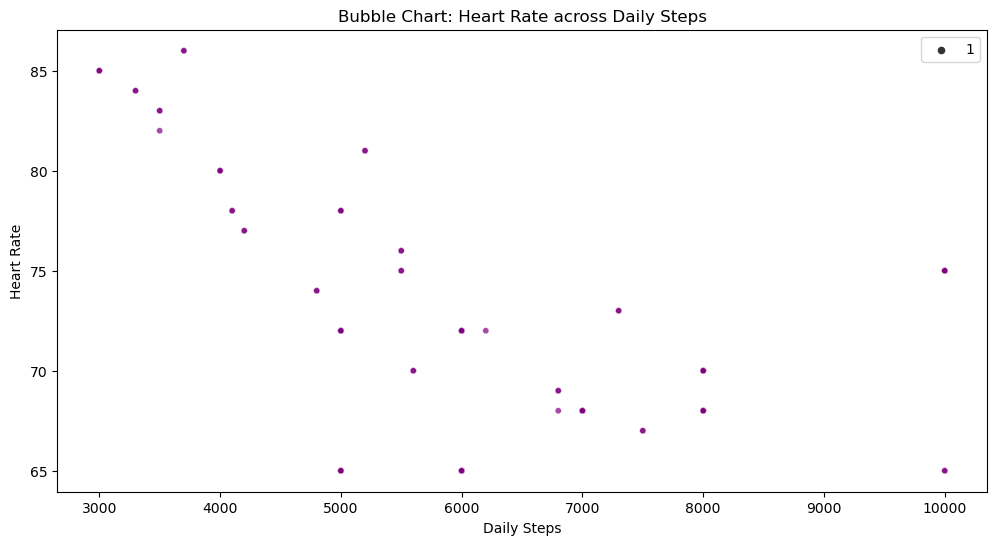

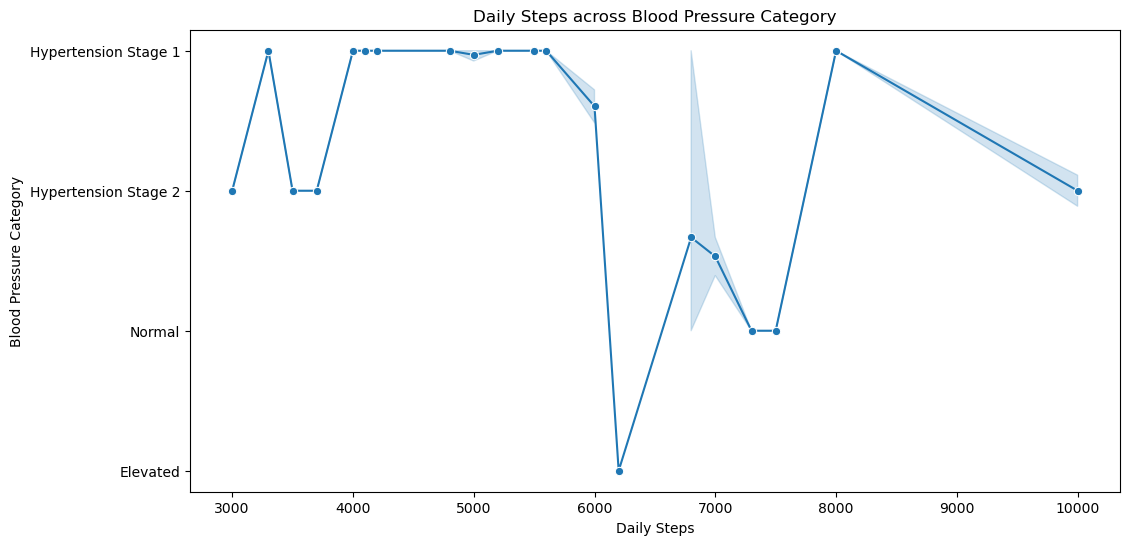

In [30]:
stacked_column_chart(df, 'Gender', 'Daily Steps', 'Distribution of Gender across Daily Steps')
stacked_column_chart(df, 'Daily Steps', 'Sleep Disorder', 'Distribution of Sleep Disorder across Daily Steps')
line_chart(df,'Daily Steps', 'Physical Activity Level','Daily Steps across Physical Activity Level')
bubble_chart(df, 'Daily Steps', 'Heart Rate', 'Bubble Chart: Heart Rate across Daily Steps')
line_chart(df,'Daily Steps', 'Blood Pressure Category','Daily Steps across Blood Pressure Category')

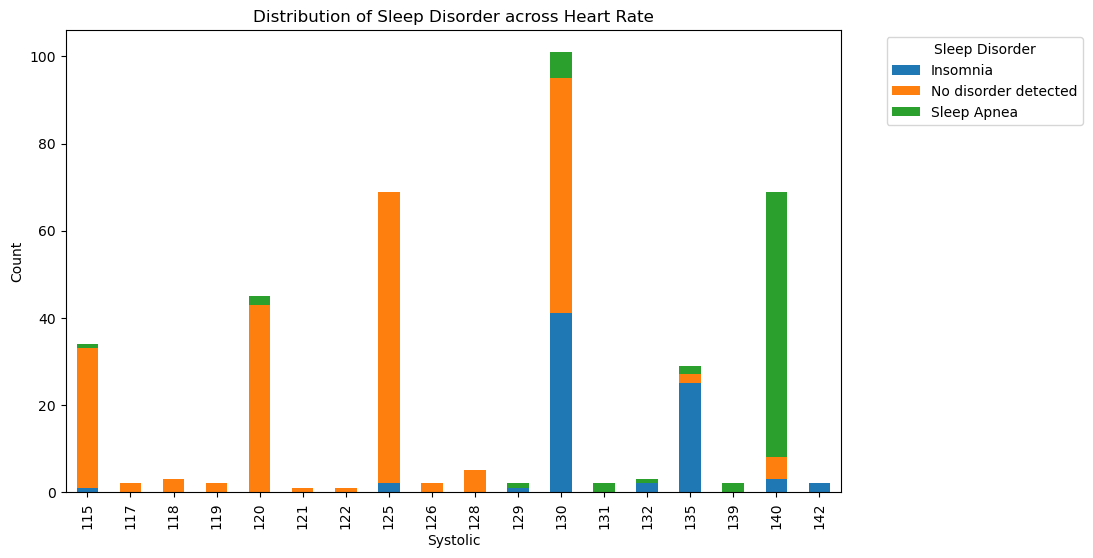

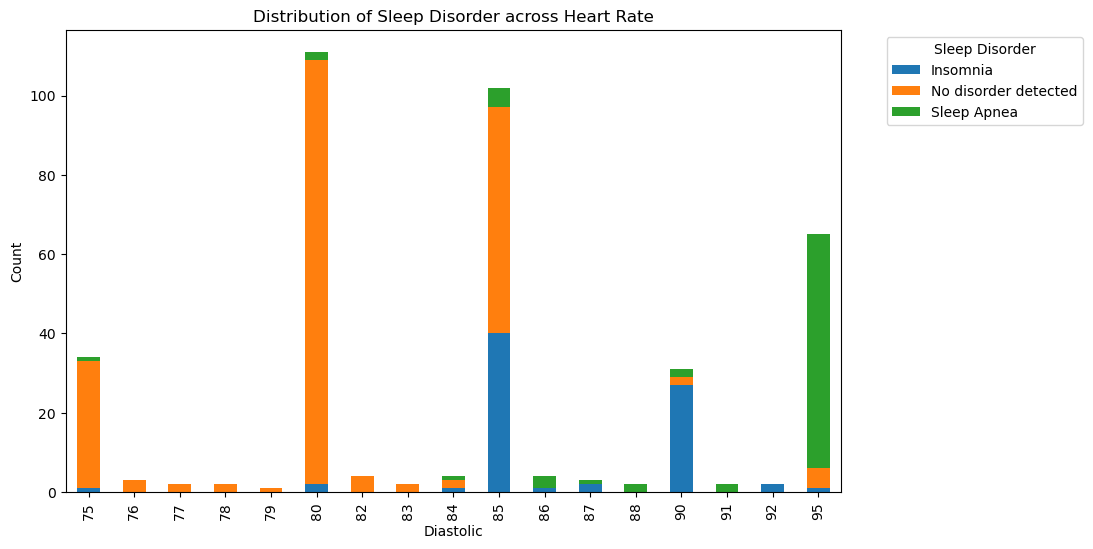

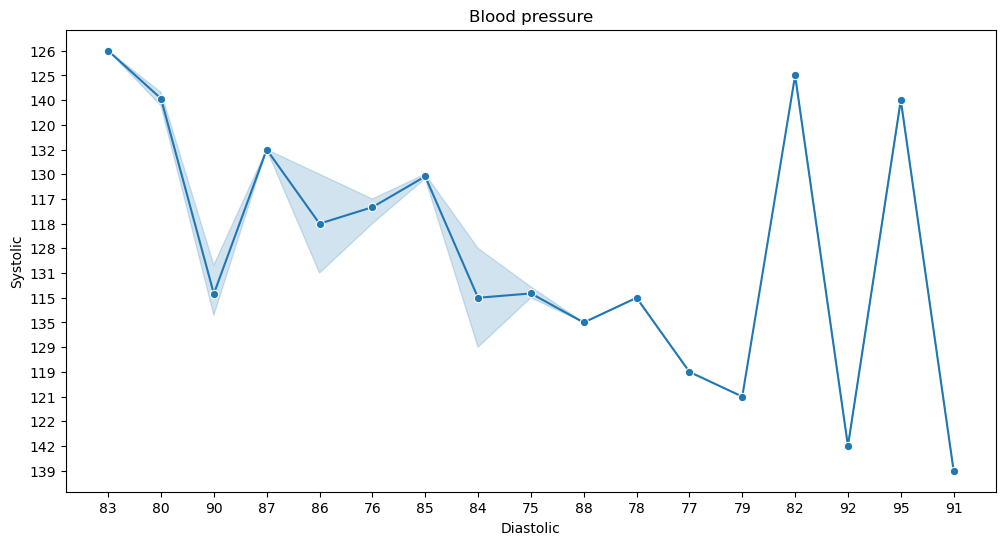

In [31]:
stacked_column_chart(df, 'Systolic', 'Sleep Disorder', 'Distribution of Sleep Disorder across Heart Rate')
stacked_column_chart(df, 'Diastolic', 'Sleep Disorder', 'Distribution of Sleep Disorder across Heart Rate')
line_chart(df,'Diastolic', 'Systolic','Blood pressure')

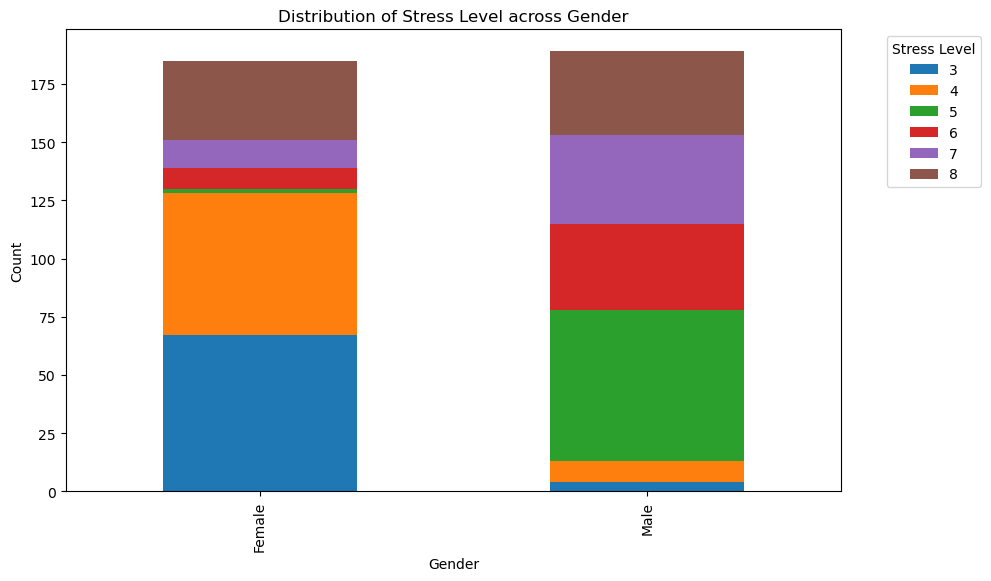

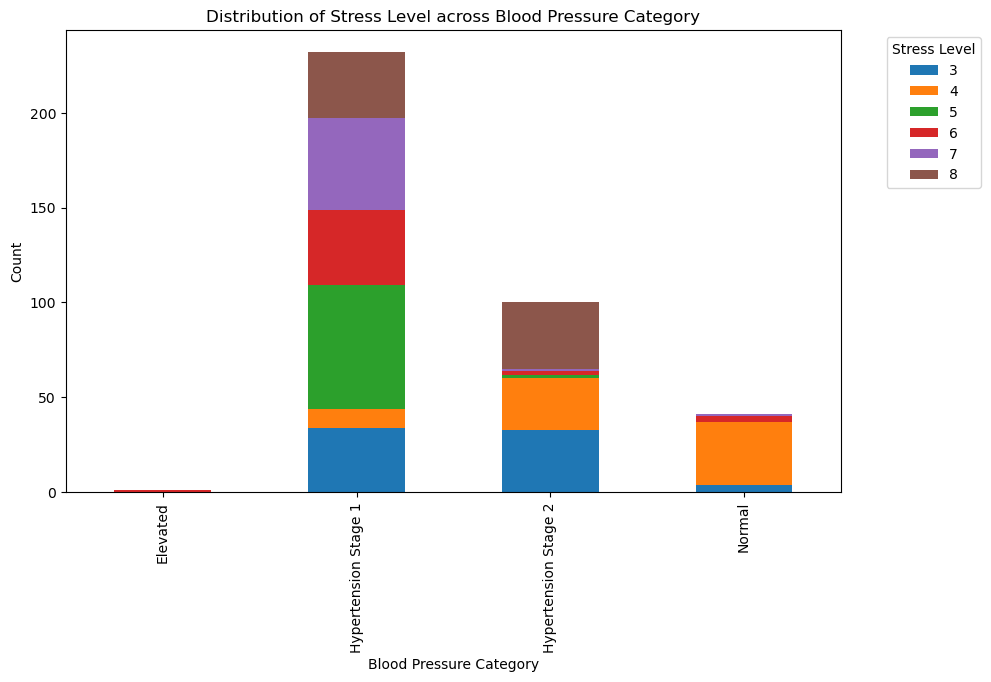

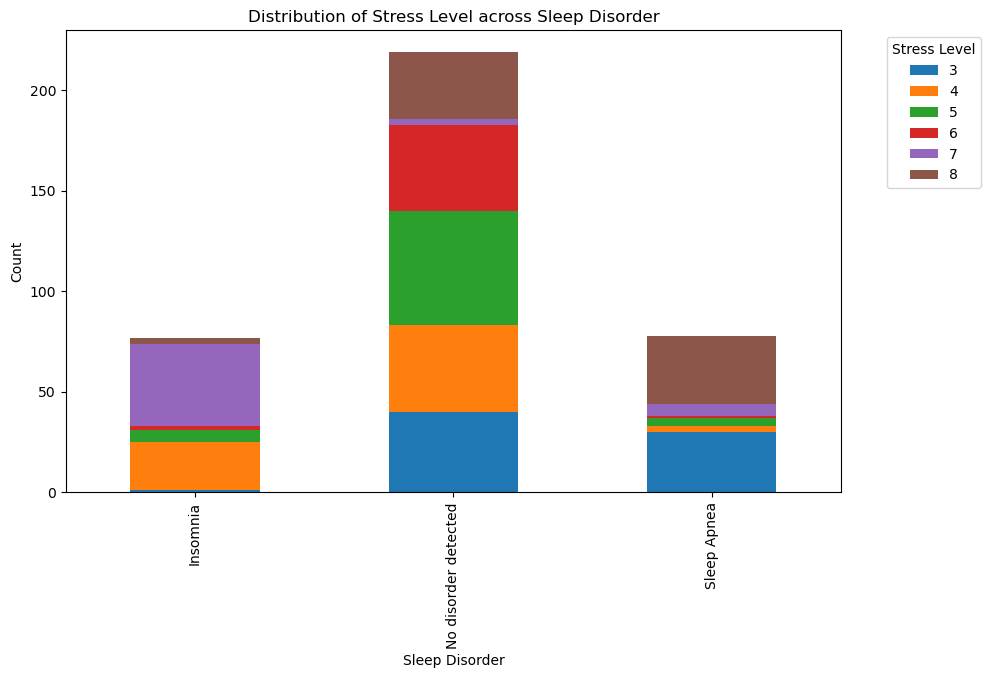

In [32]:
stacked_column_chart(df, 'Gender', 'Stress Level', 'Distribution of Stress Level across Gender')
stacked_column_chart(df, 'Blood Pressure Category', 'Stress Level', 'Distribution of Stress Level across Blood Pressure Category')
stacked_column_chart(df, 'Sleep Disorder', 'Stress Level', 'Distribution of Stress Level across Sleep Disorder')

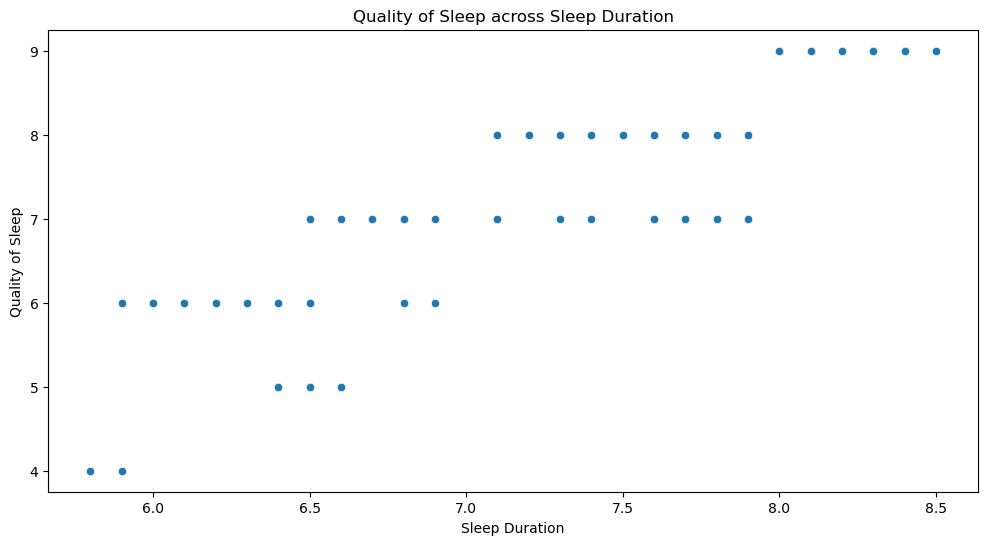

In [33]:
#sleep dur, quality

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep')
plt.title('Quality of Sleep across Sleep Duration')
plt.show()

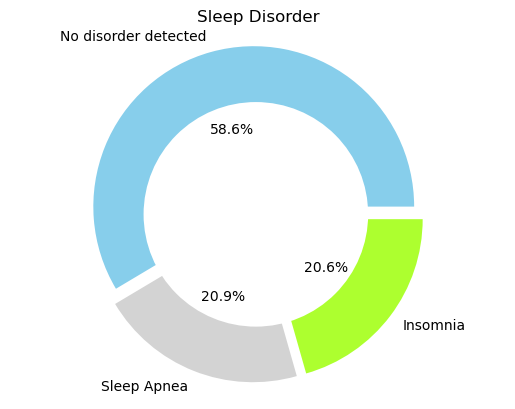

In [34]:
#Sleep Disorder
sizes = df['Sleep Disorder'].value_counts()
labels = sizes.index
colors = ['skyblue', 'lightgrey','#ADFF2F']  
explode = (0.05, 0.05, 0.05)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', pctdistance=0.50, explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Sleep Disorder')
plt.axis('equal') 
plt.show()

# Data Modelling

In [35]:
#Logistic regression

In [36]:
ff=df1.copy()
ff=ff.drop(['Sleep Disorder'], axis=1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(ff, df["Sleep Disorder"], test_size=0.2, random_state=125)
model= LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

accuracy= accuracy_score(y_test, y_pred)
classification_rep=classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report :\n", classification_rep)

Accuracy: 0.6533333333333333
Classification Report :
                       precision    recall  f1-score   support

            Insomnia       0.00      0.00      0.00        13
No disorder detected       0.67      0.84      0.75        45
         Sleep Apnea       0.85      0.65      0.73        17

            accuracy                           0.65        75
           macro avg       0.50      0.50      0.49        75
        weighted avg       0.59      0.65      0.61        75



C:\Users\linag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [38]:
x_train, x_test, y_train, y_test = train_test_split(ff, df['Sleep Disorder'], test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)

model.fit(x_train, y_train)

predictions = model.predict(x_test)
y_scores = model.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.88


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 14  2]
 [ 3 33  7]
 [ 2 10  4]]


In [40]:
x_train, x_test, y_train, y_test = train_test_split(ff, df['Sleep Disorder'], test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8933333333333333


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 14  2]
 [ 3 33  7]
 [ 2 10  4]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

            Insomnia       0.00      0.00      0.00        16
No disorder detected       0.58      0.77      0.66        43
         Sleep Apnea       0.31      0.25      0.28        16

            accuracy                           0.49        75
           macro avg       0.30      0.34      0.31        75
        weighted avg       0.40      0.49      0.44        75



In [43]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

final_model = RandomForestClassifier(**best_params)
final_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=50)

In [44]:
x = ff
y = df['Sleep Disorder']

classifier = RandomForestClassifier()  

num_folds = 5

stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(classifier, x, y, cv=stratified_kfold, scoring='accuracy')

for fold, accuracy in enumerate(accuracy_scores, 1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

mean_accuracy = accuracy_scores.mean()
print(f'Mean Accuracy Across {num_folds} Folds = {mean_accuracy:.4f}')

Fold 1: Accuracy = 0.9333
Fold 2: Accuracy = 0.9467
Fold 3: Accuracy = 0.8933
Fold 4: Accuracy = 0.8667
Fold 5: Accuracy = 0.9054
Mean Accuracy Across 5 Folds = 0.9091


In [45]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 0 14  2]
 [ 3 33  7]
 [ 2 10  4]]

Classification Report:
                      precision    recall  f1-score   support

            Insomnia       0.00      0.00      0.00        16
No disorder detected       0.58      0.77      0.66        43
         Sleep Apnea       0.31      0.25      0.28        16

            accuracy                           0.49        75
           macro avg       0.30      0.34      0.31        75
        weighted avg       0.40      0.49      0.44        75



In [46]:
print(accuracy)

0.9054054054054054


In [47]:
import joblib

# Save the trained model to a file
joblib.dump(final_model, 'trained_model.joblib')

['trained_model.joblib']